<a href="https://colab.research.google.com/github/unkind58/Project_Football_Kits_Classifier/blob/main/football_kits_classifier_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 38.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
from IPython.display import Image

In [4]:
%pwd

'/content'

In [5]:
!ls

sample_data


In [6]:
!dir

sample_data


In [7]:
%cd sample_data/
!ls

/content/sample_data
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
path = Path('/content/gdrive/MyDrive/Projects/Data')

%cd /content/gdrive/MyDrive/Projects/Data

/content/gdrive/MyDrive/Projects/Data


In [38]:
!ls

'ADO Den Haag'		  'Fortuna Sittard'	  'Portland Timbers'
'Club Atletico Aldosivi'  'Manchester United FC'  'Sunderland AFC'
'FC Nantes'		   models		  'West Bromwich Albion FC'
'FC Neman Grodno'	  'Norwich City FC'


In [39]:
files = get_image_files(path/"ADO Den Haag")

In [40]:
len(files)

34

In [16]:
files[0]

PosixPath('/content/gdrive/MyDrive/Projects/Data/ADO Den Haag/d_18.jpg')

In [42]:
np.random.seed(58)
dls = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224, 
                                  num_workers=4, 
                                  bs=16).normalize(imagenet_stats)

In [32]:
dls.classes, dls.c, len(dls.train_ds),len(dls.valid_ds)

(['ADO Den Haag',
  'Club Atletico Aldosivi',
  'FC Nantes',
  'FC Neman Grodno',
  'Fortuna Sittard',
  'Manchester United FC',
  'Norwich City FC',
  'Portland Timbers',
  'Sunderland AFC',
  'West Bromwich Albion FC'],
 10,
 195,
 48)

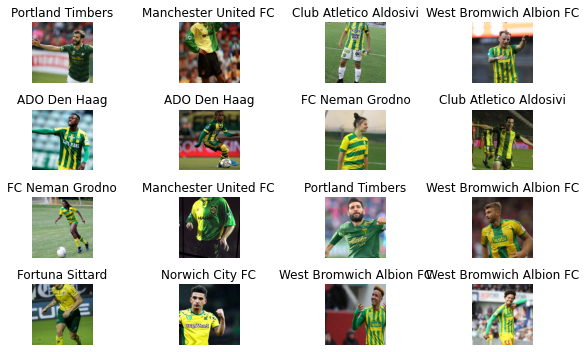

In [44]:
dls.show_batch(rows=4, figsize=(8,5))

In [45]:
learn = cnn_learner(dls,models.resnet34,metrics=error_rate)

In [46]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.332546,1.669752,0.583333,00:14
1,2.339407,1.077659,0.333333,00:12
2,1.636484,0.935048,0.312500,00:12
3,1.312319,0.931770,0.270833,00:12


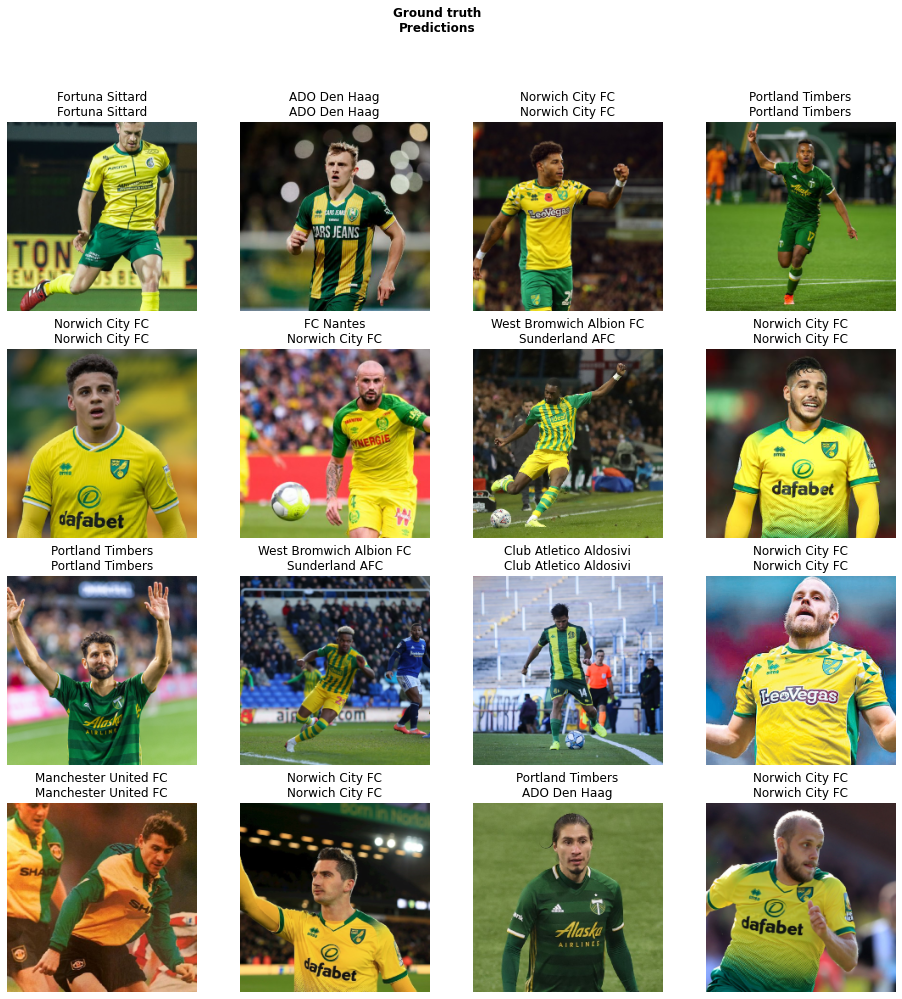

In [47]:
learn.show_results()

In [48]:
learn.save('stage-1')

In [49]:
learn.unfreeze()

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [62]:
 dls.valid_ds.items

array([PosixPath('/content/gdrive/MyDrive/Projects/Data/Fortuna Sittard/s_22.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/ADO Den Haag/d_2.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/Norwich City FC/n_13.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/Portland Timbers/p_6.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/Norwich City FC/n_9.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/FC Nantes/a_24.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/West Bromwich Albion FC/w_17.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/Norwich City FC/n_2.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/Portland Timbers/p_2.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/West Bromwich Albion FC/w_2.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/Club Atletico Aldosivi/c_1.jpg'),
       PosixPath('/content/gdrive/MyDrive/Projects/Data/Norwich Cit

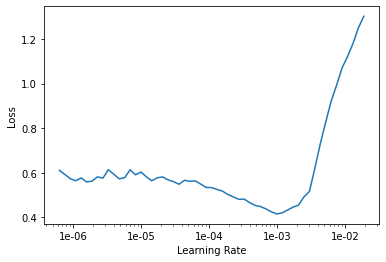

In [52]:
learn.recorder.plot()

In [53]:
interp = ClassificationInterpretation.from_learner(learn)

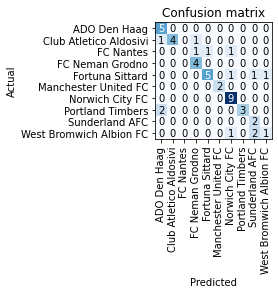

In [54]:
interp.plot_confusion_matrix()

In [55]:
interp_losses = Interpretation.from_learner(learn)
# interp_losses.plot_top_losses(9, figsize=(15,10))

In [ ]:
learn.load('stage-1')

In [61]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.109791,3.729565,0.583333,00:12
1,2.205675,1.893790,0.645833,00:12
2,2.002917,1.616746,0.541667,00:12
